# Langkah 0 - Import Library

In [34]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [35]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

# Langkah 1 - Load Data dan Visualisasikan

In [36]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))
    
    return img_list

In [37]:
# Load training data
train_img = load_dataset(train_dir)

In [38]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 75,  93,  93],
         [ 73,  91,  91],
         [ 74,  92,  92]],
 
        [[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 77,  95,  95],
         [ 76,  94,  94],
         [ 78,  96,  96]],
 
        [[253, 255, 252],
         [253, 255, 252],
         [253, 255, 252],
         ...,
         [ 75,  93,  93],
         [ 74,  92,  92],
         [ 76,  94,  94]],
 
        ...,
 
        [[108, 112, 113],
         [ 98, 102, 103],
         [ 90,  94,  95],
         ...,
         [ 43,  45,  32],
         [ 45,  47,  34],
         [ 48,  50,  37]],
 
        [[107, 111, 112],
         [ 97, 101, 102],
         [ 90,  94,  95],
         ...,
         [ 42,  44,  31],
         [ 45,  47,  34],
         [ 48,  50,  37]],
 
        [[100, 104, 105],
         [ 91,  95,  96],
         [ 86,  90,  91],
         ...,
         [ 42,  44,  31],
  

In [39]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 88
(469, 640, 3)


In [40]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (469, 640, 3)
Label	: night


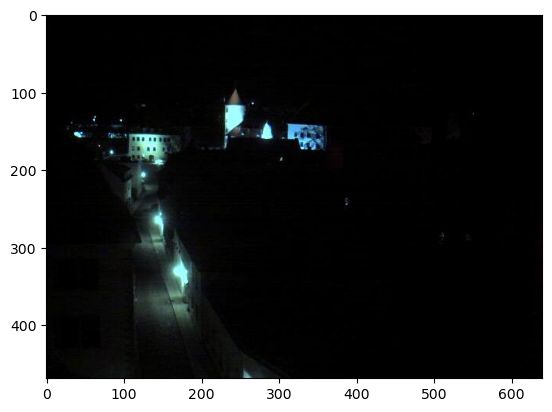

In [41]:
random_img_viz(train_img)

# Langkah 3 - Pra Pengolahan Data


In [42]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [43]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

In [44]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

In [45]:
train_std_img_list = preprocess(train_img)

In [46]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 24
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 0


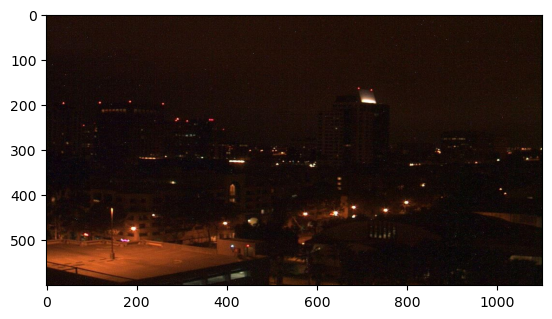

In [47]:
random_img_viz(train_std_img_list)

In [48]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 7
Avg Brighness: 110.2523


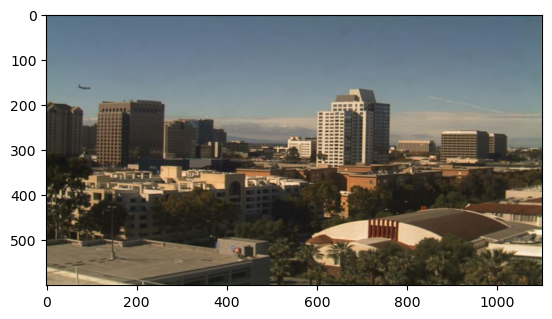

In [49]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [50]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

Image 111
Actual label: 1
Predicted label: 1


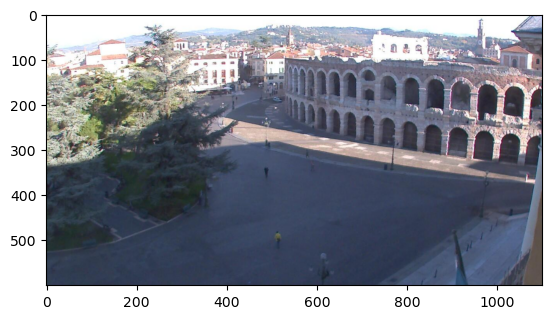

In [51]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [52]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img
    
    return accuracy, miss_labels

In [53]:
# Evaluate on train data
# evaluate(train_std_img_list, threshold=104)

# do foreach from 0 to 255 and take the best threshold depends on the accuracy
current = 0
best_threshold = 0
for i in range(0, 256):
    accu, miss = evaluate(train_std_img_list, threshold=i)
    
    if accu > current:
        current = accu
        best_threshold = i
    
print(f'Best Threshold: {best_threshold}')
print(f'Accuracy: {current:.4f}')
    
    
    

Best Threshold: 103
Accuracy: 0.9125
